#Import Libraries

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

# Read the preprocessed train dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Read the csv file

merged_data = pd.read_csv('/content/drive/MyDrive/CAPSTONE/Train/Customer_segmentation1.csv')

In [5]:
# Print the first five rows of the data

merged_data.head(10)

,City,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,DateOfRegistration_Year,DateOfRegistration_Month,DateOfRegistration_Day,EmailType_CustomizedEmail,MailOpened_yes,MailOpened_no,MailClicked_yes,TimeDifference,Orders_TimeDifference,OrderQuantity_mean,Orders_count,RetentionPotential
0,1.0,0,0,0,1.0,2012,9,28,29,30,0,1,300,0,15.000000,1,0
1,1.0,1,1,1,0.0,2010,12,19,95,89,7,10,1096,1024,83.946237,186,1
2,1.0,0,0,0,6.0,2010,10,3,0,1,0,0,0,217,34.076923,13,2
3,3.0,0,0,0,1.0,2010,11,27,30,28,3,4,751,791,106.857143,7,1
4,1.0,1,1,0,0.0,2009,12,4,64,19,46,10,1504,848,69.117647,34,1
5,1.0,1,0,0,1.0,2010,12,29,34,33,2,3,1072,1024,65.788321,137,1
6,1.0,0,0,1,0.0,2010,9,22,48,41,8,1,1210,1154,86.740000,100,1
7,1.0,0,0,0,6.0,2009,11,16,40,36,5,18,1511,972,86.953488,86,1
8,1.0,1,1,1,1.0,2009,7,25,69,3,67,2,1630,1161,127.289855,69,1
9,1.0,0,0,0,5.0,2010,3,14,38,15,24,9,1223,950,118.026667,75,1


# Split Data

In [6]:
# Seperate independent and dependent columns
X = merged_data.drop(['RetentionPotential'], axis=1).values
y = merged_data['RetentionPotential'].values

In [8]:
# Split the data by using train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Model Building

## Decision Tree

In [9]:
# Build the decision tree model
model1 = DecisionTreeClassifier(criterion='entropy', max_depth=10)
model1.fit(X_train, y_train)

# Evaluate the performance of the model
y_train_pred1 = model1.predict(X_train)

y_test_pred1 = model1.predict(X_test)

In [10]:
print(classification_report(y_train, y_train_pred1))

              precision    recall  f1-score   support

           0       0.78      0.64      0.70      3005
           1       0.93      0.96      0.95     15348
           2       0.99      0.92      0.95       703

    accuracy                           0.91     19056
   macro avg       0.90      0.84      0.87     19056
weighted avg       0.91      0.91      0.91     19056



In [11]:
print(classification_report(y_test, y_test_pred1))

              precision    recall  f1-score   support

           0       0.74      0.63      0.68       751
           1       0.92      0.95      0.94      3837
           2       0.90      0.84      0.86       176

    accuracy                           0.90      4764
   macro avg       0.85      0.81      0.83      4764
weighted avg       0.89      0.90      0.90      4764



## Hyperparameter Tuning

In [12]:
from sklearn.model_selection import GridSearchCV
param = {'max_depth':[5,6,7,10,11,13,15],  
         'min_samples_leaf':[10,12,15,13,20],
         'min_samples_split':[2,3,4,5],
        'criterion':['gini','entropy']}

hyp_model1 = GridSearchCV(model1, param, cv=4 )  
best_dec = hyp_model1.fit(X_train, y_train) 

In [13]:
best_dec.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'min_samples_leaf': 13,
 'min_samples_split': 3}

In [14]:
# Extract the best estimator (decision tree) from the GridSearchCV object
best_dt = hyp_model1.best_estimator_

In [15]:
y_train_pred1_hyp = best_dt.predict(X_train)
y_test_pred1_hyp = best_dt.predict(X_test)

In [16]:
print(classification_report(y_train, y_train_pred1_hyp))

              precision    recall  f1-score   support

           0       0.75      0.66      0.70      3005
           1       0.93      0.96      0.94     15348
           2       0.92      0.78      0.84       703

    accuracy                           0.91     19056
   macro avg       0.87      0.80      0.83     19056
weighted avg       0.90      0.91      0.90     19056



In [17]:
print(classification_report(y_test, y_test_pred1_hyp))

              precision    recall  f1-score   support

           0       0.70      0.61      0.65       751
           1       0.92      0.95      0.94      3837
           2       0.90      0.80      0.85       176

    accuracy                           0.89      4764
   macro avg       0.84      0.79      0.81      4764
weighted avg       0.89      0.89      0.89      4764



# Patterns

In [18]:
features = ['City', 'OnlineCommunication', 'AutomaticRefill', 'DoorstepDelivery',
       'PreferredDeliveryDay', 'DateOfRegistration_Year',
       'DateOfRegistration_Month', 'DateOfRegistration_Day',
       'EmailType_CustomizedEmail', 'MailOpened_yes', 'MailOpened_no',
       'MailClicked_yes', 'TimeDifference', 'Orders_TimeDifference',
       'OrderQuantity_mean', 'Orders_count']

X_train = pd.DataFrame(X_train, columns=features)

In [19]:
from sklearn.tree import DecisionTreeClassifier, export_text

# Extract rules from the tree
tree_rules = export_text(best_dt, feature_names=list(X_train.columns))
print(tree_rules)

|--- EmailType_CustomizedEmail <= 15.50
|   |--- OnlineCommunication <= 0.50
|   |   |--- Orders_count <= 4.50
|   |   |   |--- Orders_TimeDifference <= 0.50
|   |   |   |   |--- DateOfRegistration_Year <= 2011.50
|   |   |   |   |   |--- DateOfRegistration_Month <= 9.50
|   |   |   |   |   |   |--- PreferredDeliveryDay <= 5.50
|   |   |   |   |   |   |   |--- OrderQuantity_mean <= 28.50
|   |   |   |   |   |   |   |   |--- DateOfRegistration_Day <= 13.50
|   |   |   |   |   |   |   |   |   |--- OrderQuantity_mean <= 16.50
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- OrderQuantity_mean >  16.50
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- DateOfRegistration_Day >  13.50
|   |   |   |   |   |   |   |   |   |--- PreferredDeliveryDay <= 2.50
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |--- PreferredDeliveryDay >  2.50
|   |   |   |   |   |   |   |  

In [20]:
# Define the target attribute
target_attribute = 'RetentionPotential'

# Calculate the information gain for each attribute
information_gains = {}
target_entropy = 0
target_counts = merged_data[target_attribute].value_counts()
for value in target_counts.index:
    p = target_counts[value] / len(merged_data[target_attribute])
    target_entropy -= p * np.log2(p)
    
for attribute in merged_data.columns:
    if attribute != target_attribute:
        attribute_counts = merged_data[attribute].value_counts()
        attribute_entropy = 0
        for value in attribute_counts.index:
            subset = merged_data[merged_data[attribute] == value]
            value_counts = subset[target_attribute].value_counts()
            value_entropy = 0
            for val in value_counts.index:
                p = value_counts[val] / len(subset)
                value_entropy -= p * np.log2(p)
            attribute_entropy += (len(subset) / len(merged_data)) * value_entropy
        information_gain = target_entropy - attribute_entropy
        information_gains[attribute] = information_gain
        
sorted_information_gains = sorted(information_gains.items(), key=lambda x: x[1], reverse=True)
for attribute, information_gain in sorted_information_gains:
    print(attribute, information_gain)

EmailType_CustomizedEmail 0.21859624576757453
OrderQuantity_mean 0.19500050525816082
MailOpened_no 0.1569708207020779
TimeDifference 0.1358733383356221
Orders_TimeDifference 0.11384060774575722
MailOpened_yes 0.08714484142272327
Orders_count 0.08030861832618819
MailClicked_yes 0.06438550777323837
DateOfRegistration_Year 0.032149825286955536
AutomaticRefill 0.024888178296940233
OnlineCommunication 0.02087664244383247
DateOfRegistration_Month 0.01983674236003785
City 0.010980266590027377
DoorstepDelivery 0.005852378034206462
DateOfRegistration_Day 0.00434047982298047
PreferredDeliveryDay 0.0013530887208308418


In [21]:
customerid = pd.read_csv('/content/drive/MyDrive/CAPSTONE/Customerid.csv')

In [22]:
merged_data1 = pd.concat([customerid, merged_data], axis=1)
merged_data1.head()

,CustomerID,City,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,DateOfRegistration_Year,DateOfRegistration_Month,DateOfRegistration_Day,EmailType_CustomizedEmail,MailOpened_yes,MailOpened_no,MailClicked_yes,TimeDifference,Orders_TimeDifference,OrderQuantity_mean,Orders_count,RetentionPotential
0,C16368,1.0,0,0,0,1.0,2012,9,28,29,30,0,1,300,0,15.000000,1,0
1,C20345,1.0,1,1,1,0.0,2010,12,19,95,89,7,10,1096,1024,83.946237,186,1
2,C17683,1.0,0,0,0,6.0,2010,10,3,0,1,0,0,0,217,34.076923,13,2
3,C18647,3.0,0,0,0,1.0,2010,11,27,30,28,3,4,751,791,106.857143,7,1
4,C36692,1.0,1,1,0,0.0,2009,12,4,64,19,46,10,1504,848,69.117647,34,1


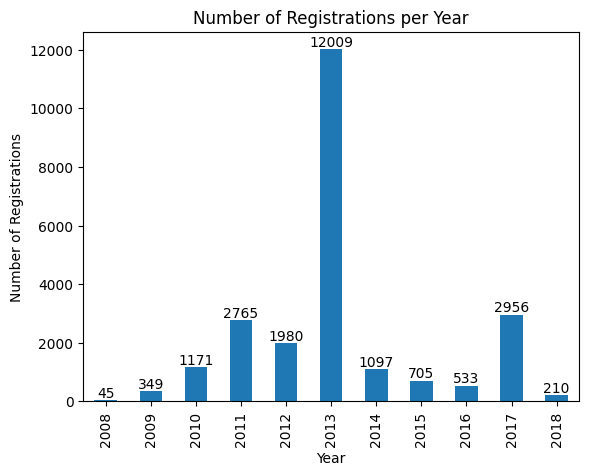

In [23]:
# Extract the relevant columns
registration_years = merged_data1['DateOfRegistration_Year']

# Count the number of registrations for each year
registration_counts = registration_years.groupby(registration_years).count()

# Create a bar plot of the registration counts
ax = registration_counts.plot.bar()

for i in ax.containers:
    ax.bar_label(i, label_type='edge')

# Set the x-axis label
plt.xlabel('Year')

# Set the y-axis label
plt.ylabel('Number of Registrations')

# Set the title of the plot
plt.title('Number of Registrations per Year')

# Display the plot
plt.show()

In [24]:
customer_C15837 = merged_data1[merged_data1['CustomerID'] == 'C15837']
customer_C15837

,CustomerID,City,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,DateOfRegistration_Year,DateOfRegistration_Month,DateOfRegistration_Day,EmailType_CustomizedEmail,MailOpened_yes,MailOpened_no,MailClicked_yes,TimeDifference,Orders_TimeDifference,OrderQuantity_mean,Orders_count,RetentionPotential
8172,C15837,1.0,0,0,0,4.0,2009,6,1,18,1,18,0,420,63,0.0,12,1


In [ ]:
# Filter the dataset to only include customers with order quantity is 0
zero_orderquantity_customers = merged_data1[merged_data1['OrderQuantity_mean'] == 0]
zero_orderquantity_customers

,CustomerID,City,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,DateOfRegistration_Year,DateOfRegistration_Month,DateOfRegistration_Day,EmailType_CustomizedEmail,MailOpened_yes,MailOpened_no,MailClicked_yes,TimeDifference,Orders_TimeDifference,OrderQuantity_mean,Orders_count,RetentionPotential
8172,C15837,1.0,0,0,0,4.0,2009,6,1,18,1,18,0,420,63,0.0,12,1


In [28]:
# Get feature importance values
importance = best_dt.feature_importances_
print(importance)

[0.00700971 0.17704325 0.00346486 0.         0.00493832 0.03367599
 0.11390667 0.02232326 0.3420248  0.01945158 0.00197849 0.00676269
 0.00775077 0.10864434 0.04683141 0.10419385]


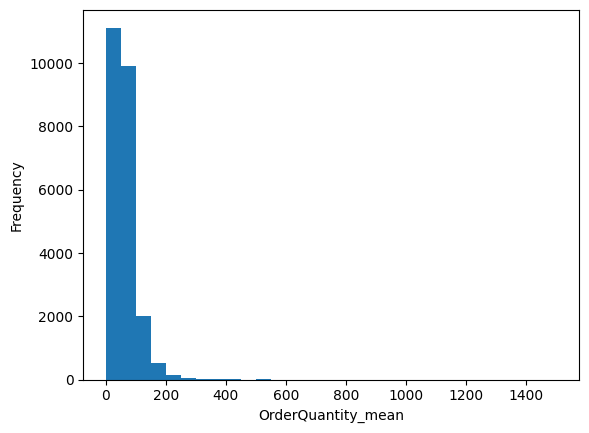

In [29]:
# create a list of bin edges
bins = [0, 50,100,150, 200,250, 300,350, 400,450, 500,550,600,650,700, 750,800,850,900,950, 1000,1050,1100,1200,1300,1400, 1501]

# plot the histogram
plt.hist(merged_data1['OrderQuantity_mean'], bins=bins)

# set the x-axis label
plt.xlabel('OrderQuantity_mean')

# set the y-axis label
plt.ylabel('Frequency')

# show the plot
plt.show()

In [30]:
# Filter the dataset to only include customers with medium retention potential
medium_retention_customers = merged_data1[merged_data1['RetentionPotential'] == 2]

# Filter the dataset to only include customers with low retention potential
low_retention_customers = merged_data1[merged_data1['RetentionPotential'] == 1]

# Filter the dataset to only include customers with high retention potential
high_retention_customers = merged_data1[merged_data1['RetentionPotential'] == 0]

#Medium Retention

In [31]:
medium_retention_customers

,CustomerID,City,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,DateOfRegistration_Year,DateOfRegistration_Month,DateOfRegistration_Day,EmailType_CustomizedEmail,MailOpened_yes,MailOpened_no,MailClicked_yes,TimeDifference,Orders_TimeDifference,OrderQuantity_mean,Orders_count,RetentionPotential
2,C17683,1.0,0,0,0,6.0,2010,10,3,0,1,0,0,0,217,34.076923,13,2
10,C23215,1.0,1,1,0,5.0,2011,4,11,16,3,14,0,990,1005,59.530769,130,2
30,C22750,1.0,0,0,0,6.0,2011,1,4,0,1,0,0,0,907,177.829268,41,2
38,C22703,1.0,0,0,0,1.0,2010,3,4,0,1,0,0,0,362,126.846154,13,2
51,C25081,2.0,1,0,0,6.0,2010,8,26,0,1,0,0,0,794,63.466667,15,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23075,C28826,3.0,0,1,0,6.0,2017,11,20,0,1,0,0,0,0,41.000000,1,2
23109,C20845,3.0,1,1,0,1.0,2017,11,21,0,1,0,0,0,0,41.000000,1,2
23117,C20659,1.0,1,1,0,0.0,2017,11,22,27,10,18,5,28,28,53.000000,2,2
23311,C15649,1.0,1,1,0,1.0,2017,12,6,0,1,0,0,0,0,41.000000,1,2


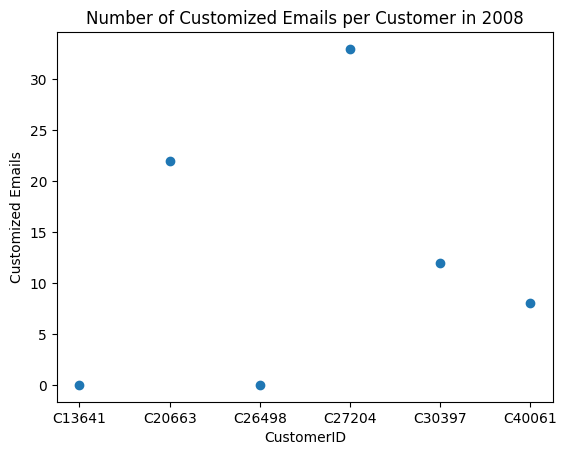

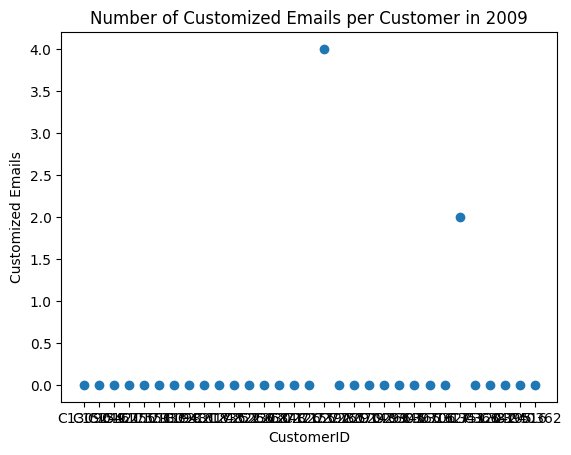

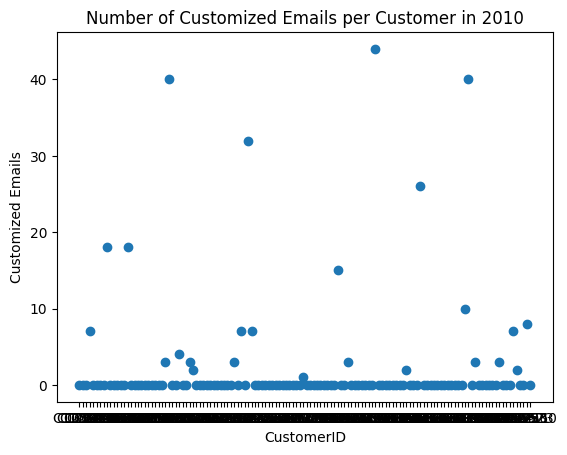

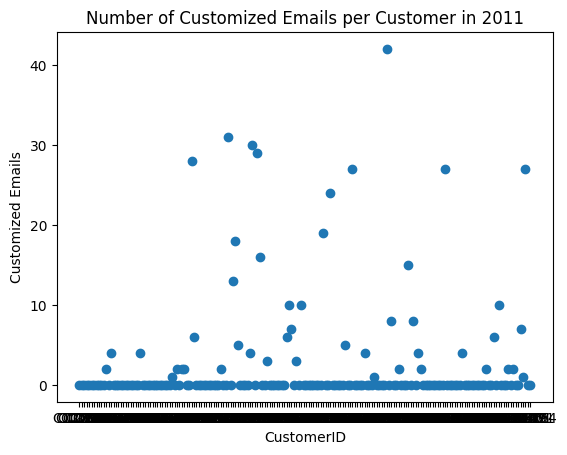

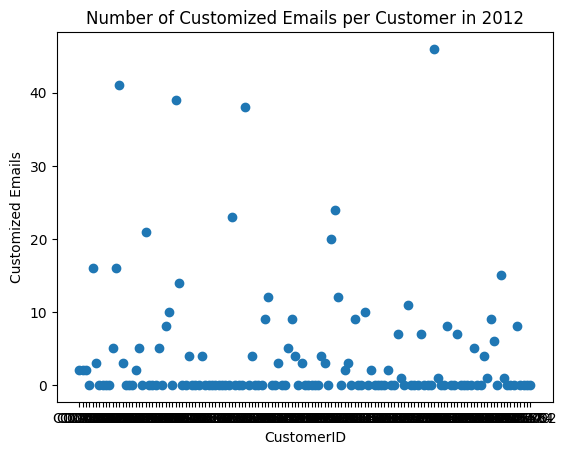

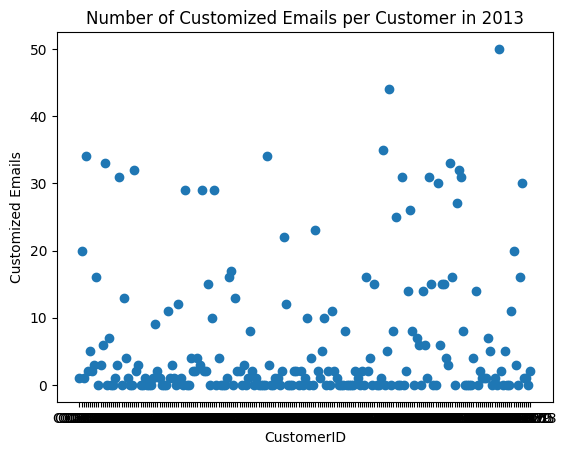

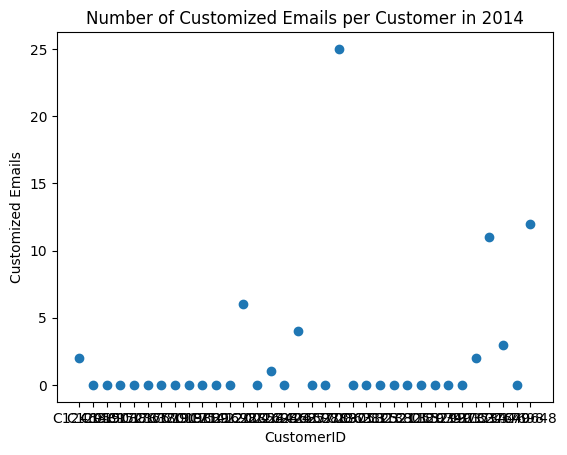

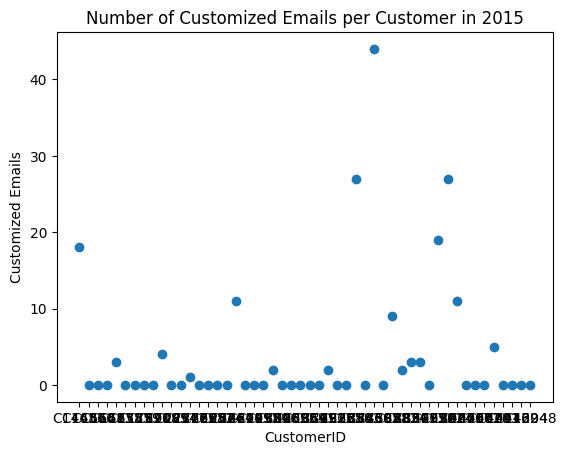

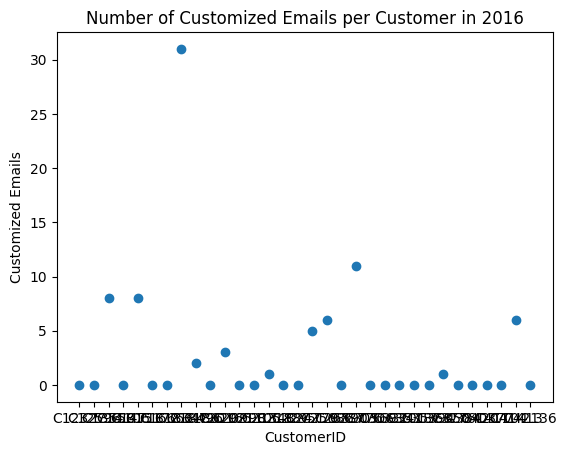

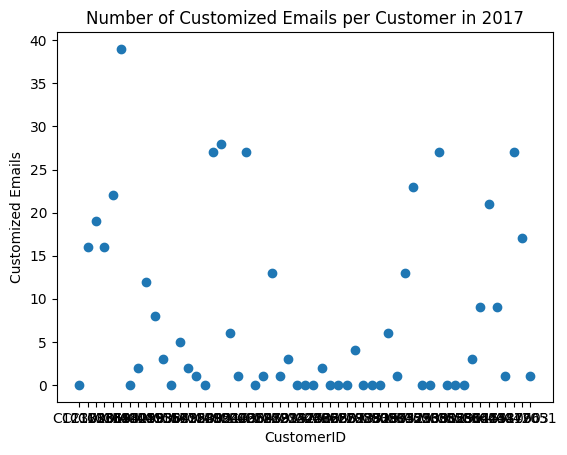

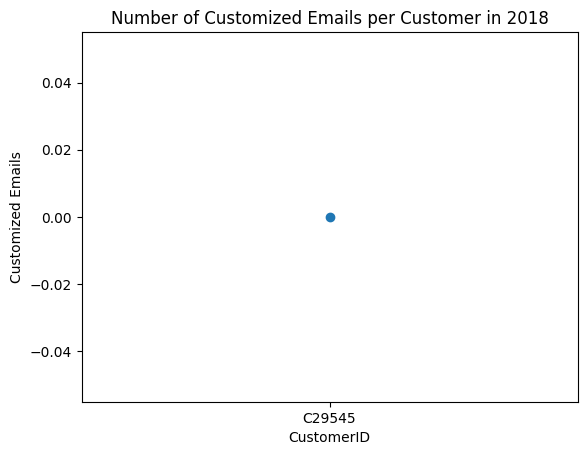

In [33]:
# Loop over the years from 2008 to 2018
for year in range(2008, 2019):
    # Extract the relevant columns for the year
    registration_years = medium_retention_customers['DateOfRegistration_Year'] == year
    year_data = medium_retention_customers[registration_years]

    # Count the number of registrations for the year
    num_registrations = year_data['CustomerID'].nunique()

    # Calculate the number of customized emails per customer for the year
    customized_emails = year_data.groupby('CustomerID')['EmailType_CustomizedEmail'].sum()

    # Create the scatter plot
    plt.scatter(customized_emails.index, customized_emails.values)

    # Set the x-axis and y-axis labels
    plt.xlabel('CustomerID')
    plt.ylabel('Customized Emails')

    # Set the title of the plot
    plt.title('Number of Customized Emails per Customer in {}'.format(year))

    # Show the plot
    plt.show()


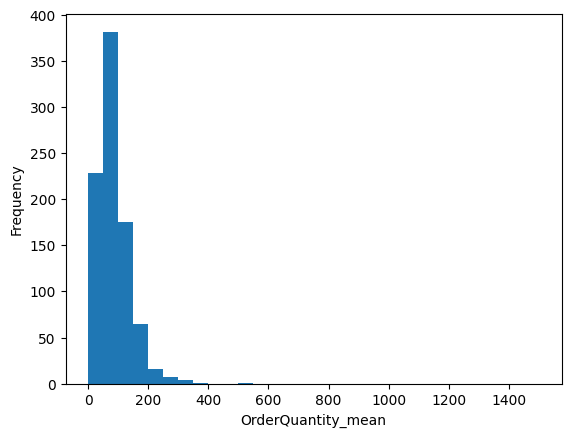

In [ ]:
# create a list of bin edges
bins = [0, 50,100,150, 200,250, 300,350, 400,450, 500,550,600,650,700, 750,800,850,900,950, 1000,1050,1100,1200,1300,1400, 1501]

# plot the histogram
plt.hist(medium_retention_customers['OrderQuantity_mean'], bins=bins)

# set the x-axis label
plt.xlabel('OrderQuantity_mean')

# set the y-axis label
plt.ylabel('Frequency')

# show the plot
plt.show()

In [ ]:
# Filter the dataset to only include customers with order quantity is 0
zero_orderquantity_customers_medium = medium_retention_customers[medium_retention_customers['OrderQuantity_mean'] == 0]
zero_orderquantity_customers_medium

,CustomerID,City,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,DateOfRegistration_Year,DateOfRegistration_Month,DateOfRegistration_Day,EmailType_CustomizedEmail,MailOpened_yes,MailOpened_no,MailClicked_yes,TimeDifference,Orders_TimeDifference,OrderQuantity_mean,Orders_count,RetentionPotential


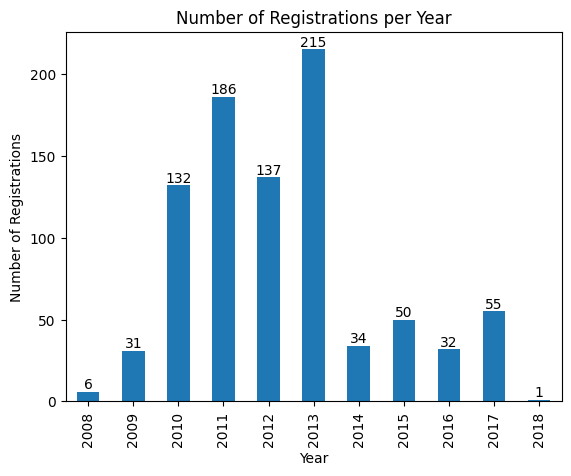

In [ ]:
# Extract the relevant columns
registration_years_2 = medium_retention_customers['DateOfRegistration_Year']

# Count the number of registrations for each year
registration_counts_2 = registration_years_2.groupby(registration_years_2).count()

# Create a bar plot of the registration counts
ax = registration_counts_2.plot.bar()

for i in ax.containers:
    ax.bar_label(i, label_type='edge')

# Set the x-axis label
plt.xlabel('Year')

# Set the y-axis label
plt.ylabel('Number of Registrations')

# Set the title of the plot
plt.title('Number of Registrations per Year')

# Display the plot
plt.show()

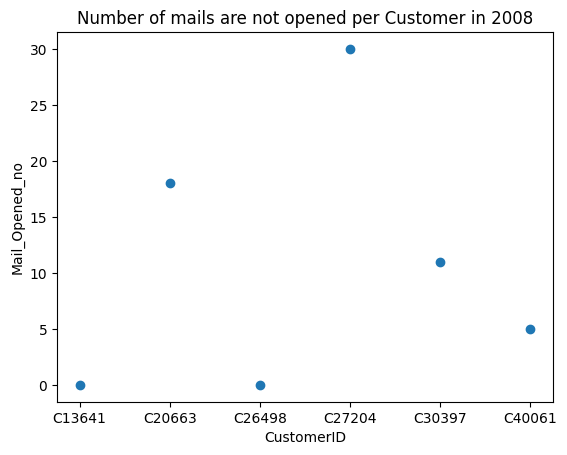

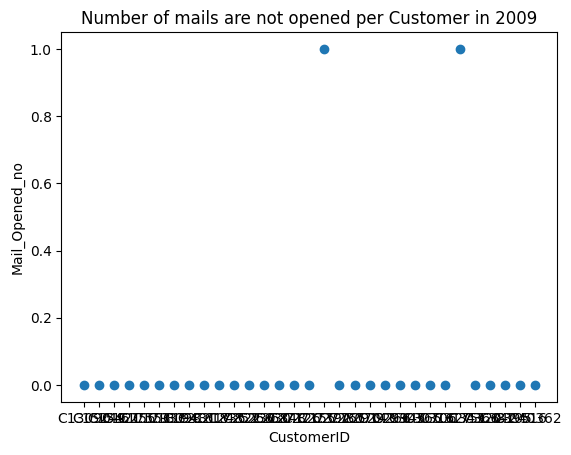

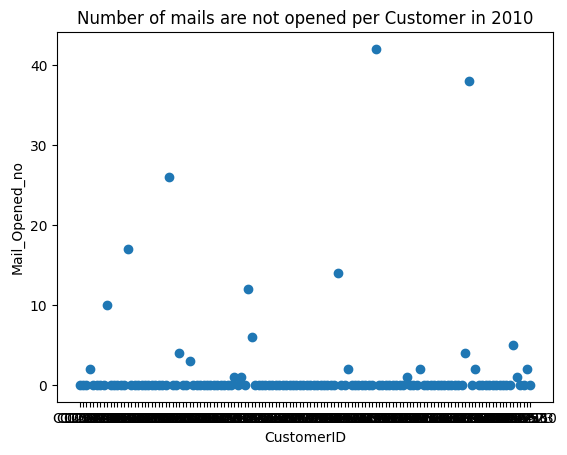

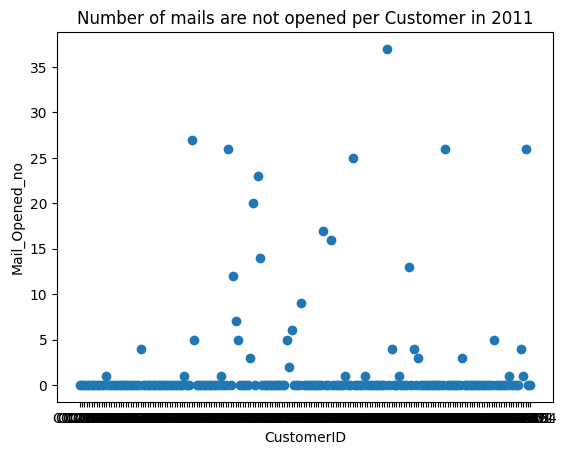

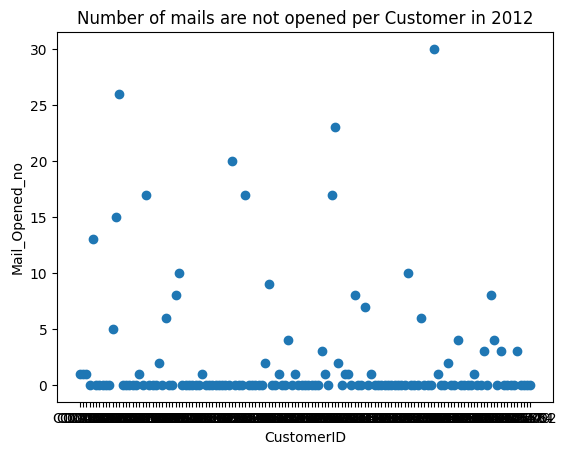

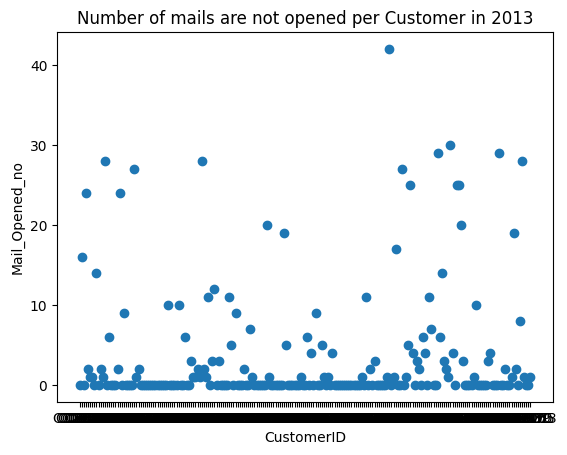

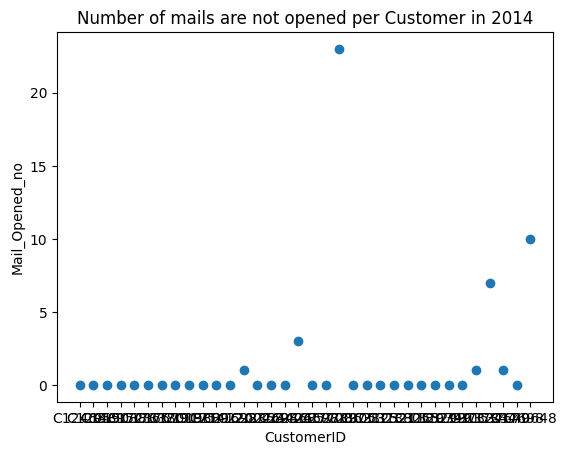

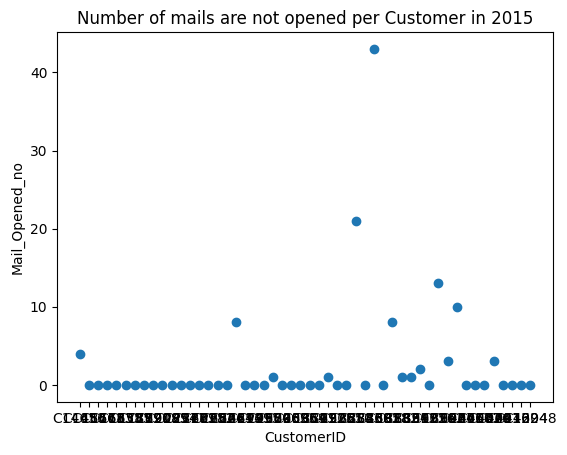

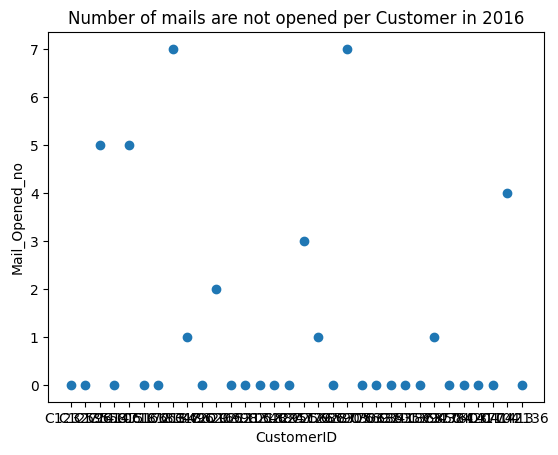

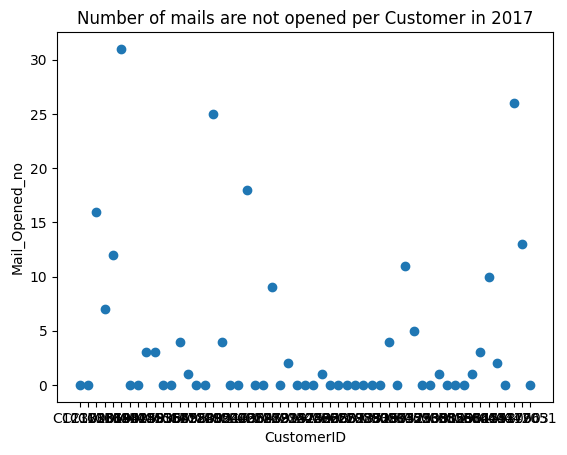

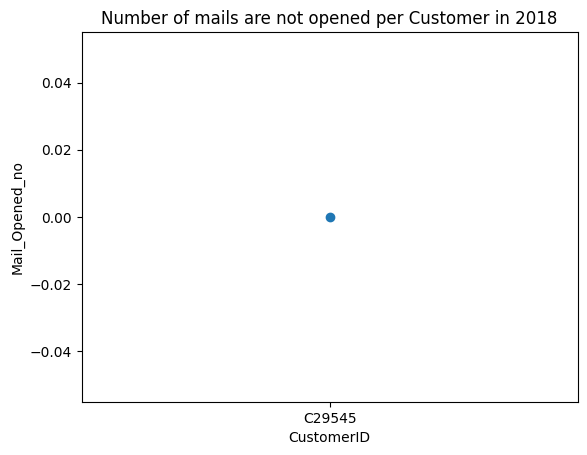

In [ ]:
# Loop over the years from 2008 to 2018
for year in range(2008, 2019):
    # Extract the relevant columns for the year
    registration_years = medium_retention_customers['DateOfRegistration_Year'] == year
    year_data = medium_retention_customers[registration_years]

    # Count the number of registrations for the year
    num_registrations = year_data['CustomerID'].nunique()

    # Calculate the number of customized emails per customer for the year
    mail_opened_no = year_data.groupby('CustomerID')['MailOpened_no'].sum()

    # Create the scatter plot
    plt.scatter(mail_opened_no.index, mail_opened_no.values)

    # Set the x-axis and y-axis labels
    plt.xlabel('CustomerID')
    plt.ylabel('Mail_Opened_no')

    # Set the title of the plot
    plt.title('Number of mails are not opened per Customer in {}'.format(year))

    # Show the plot
    plt.show()

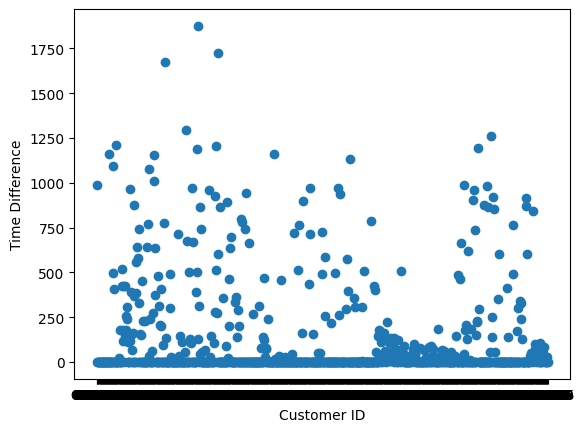

In [ ]:
plt.scatter(medium_retention_customers['CustomerID'], medium_retention_customers['TimeDifference'])
plt.xlabel('Customer ID')
plt.ylabel('Time Difference')
plt.show()

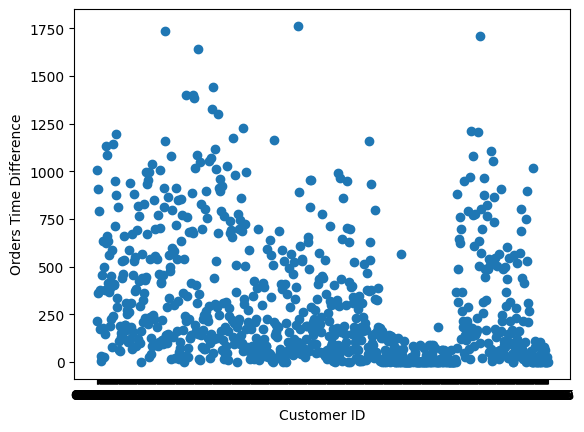

In [ ]:
plt.scatter(medium_retention_customers['CustomerID'], medium_retention_customers['Orders_TimeDifference'])
plt.xlabel('Customer ID')
plt.ylabel('Orders Time Difference')
plt.show()

#Low Retention

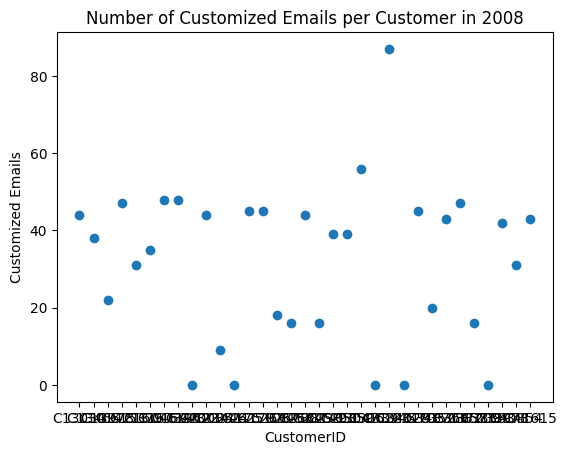

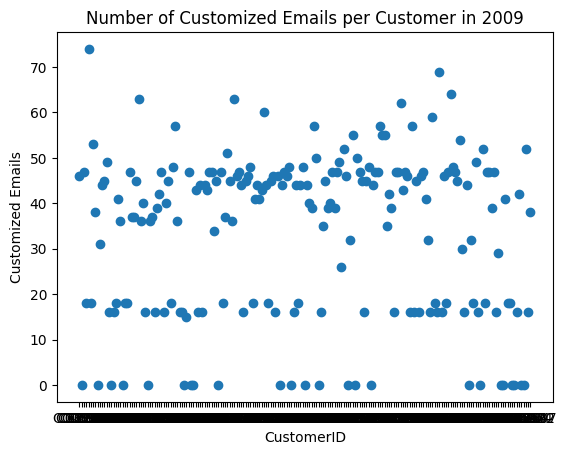

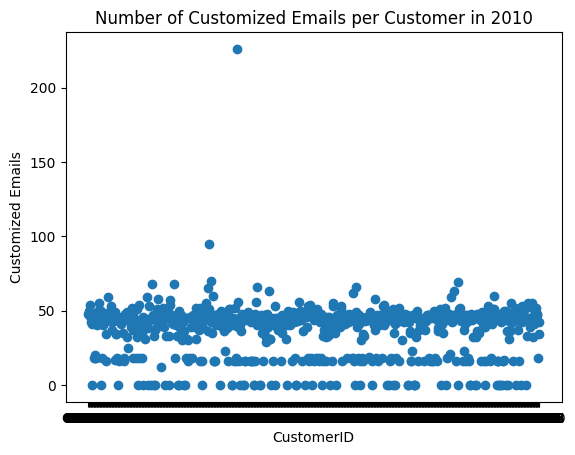

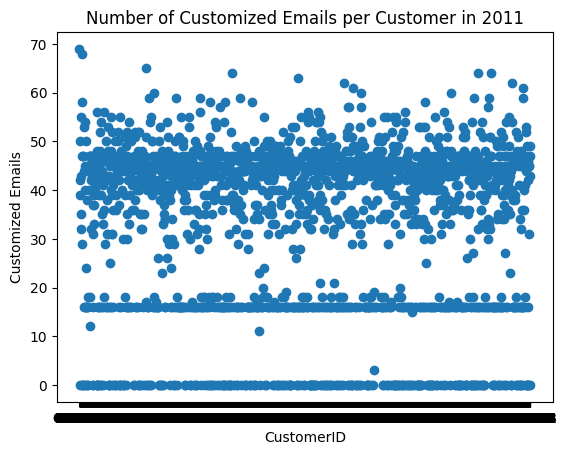

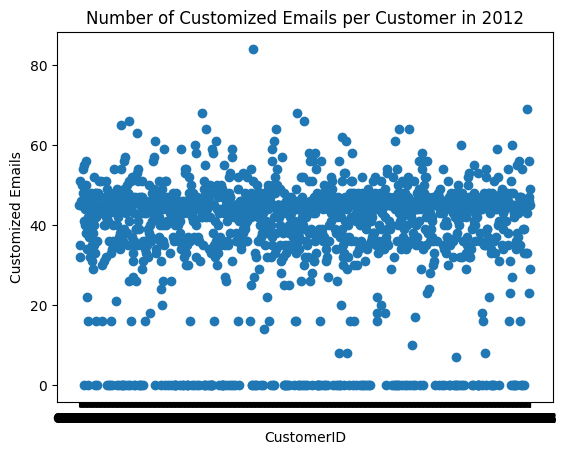

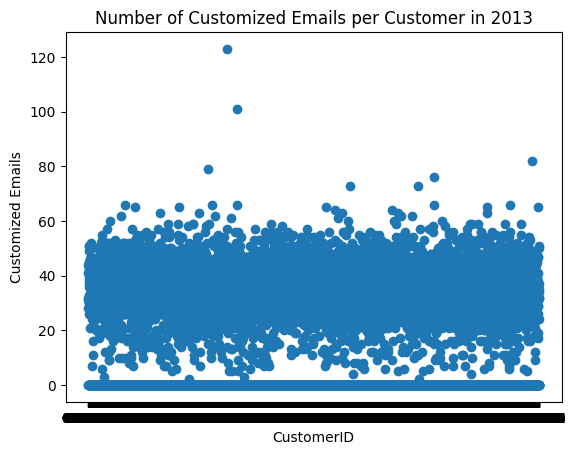

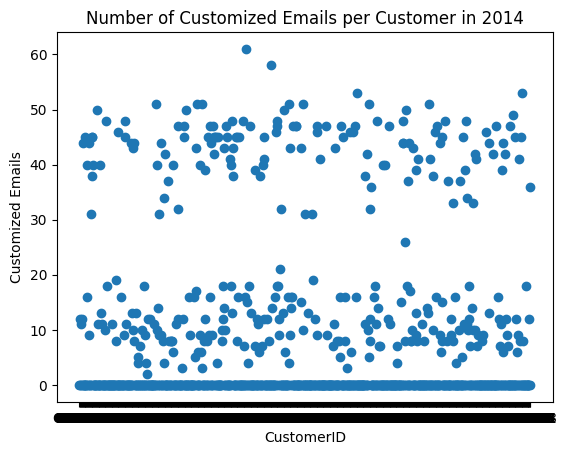

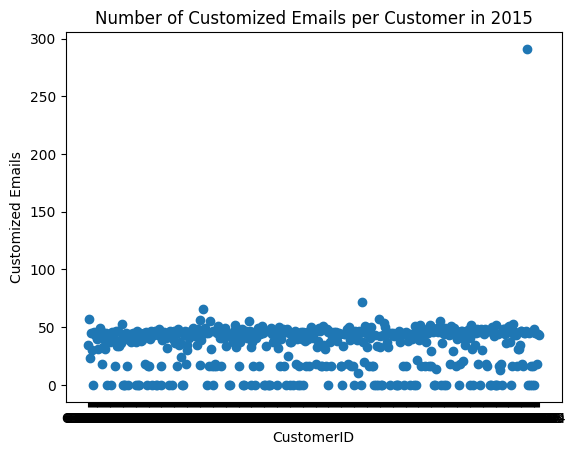

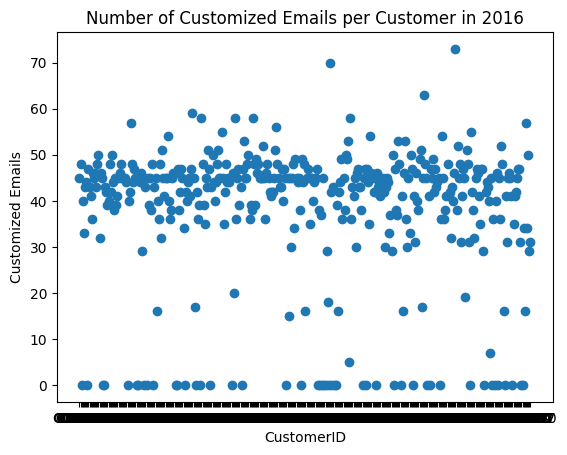

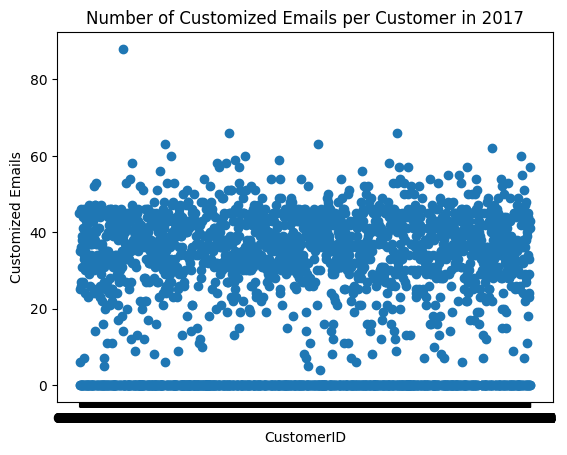

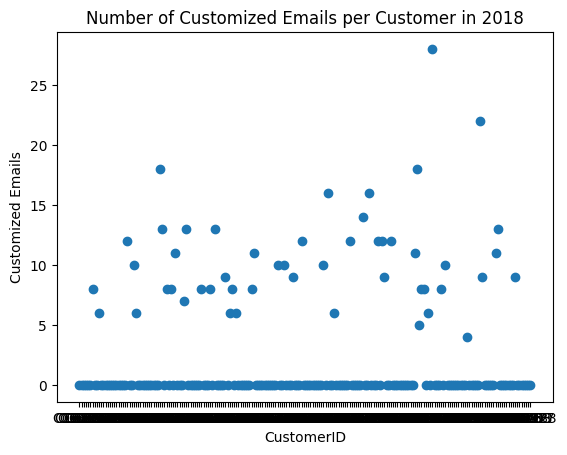

In [ ]:
# Loop over the years from 2008 to 2018
for year in range(2008, 2019):
    # Extract the relevant columns for the year
    registration_years = low_retention_customers['DateOfRegistration_Year'] == year
    year_data = low_retention_customers[registration_years]

    # Count the number of registrations for the year
    num_registrations = year_data['CustomerID'].nunique()

    # Calculate the number of customized emails per customer for the year
    customized_emails = year_data.groupby('CustomerID')['EmailType_CustomizedEmail'].sum()

    # Create the scatter plot
    plt.scatter(customized_emails.index, customized_emails.values)

    # Set the x-axis and y-axis labels
    plt.xlabel('CustomerID')
    plt.ylabel('Customized Emails')

    # Set the title of the plot
    plt.title('Number of Customized Emails per Customer in {}'.format(year))

    # Show the plot
    plt.show()

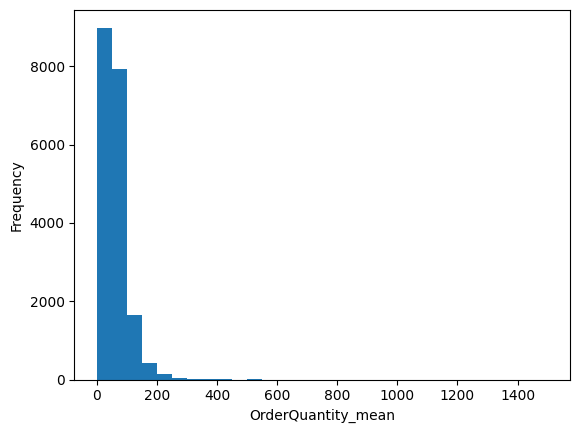

In [ ]:
# create a list of bin edges
bins = [0, 50,100,150, 200,250, 300,350, 400,450, 500,550,600,650,700, 750,800,850,900,950, 1000,1050,1100,1200,1300,1400, 1501]

# plot the histogram
plt.hist(low_retention_customers['OrderQuantity_mean'], bins=bins)

# set the x-axis label
plt.xlabel('OrderQuantity_mean')

# set the y-axis label
plt.ylabel('Frequency')

# show the plot
plt.show()

In [ ]:
# Filter the dataset to only include customers with order quantity is 0
zero_orderquantity_customers_low = low_retention_customers[low_retention_customers['OrderQuantity_mean'] == 0]
zero_orderquantity_customers_low

,CustomerID,City,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,DateOfRegistration_Year,DateOfRegistration_Month,DateOfRegistration_Day,EmailType_CustomizedEmail,MailOpened_yes,MailOpened_no,MailClicked_yes,TimeDifference,Orders_TimeDifference,OrderQuantity_mean,Orders_count,RetentionPotential
8172,C15837,1.0,0,0,0,4.0,2009,6,1,18,1,18,0,420,63,0.0,12,1


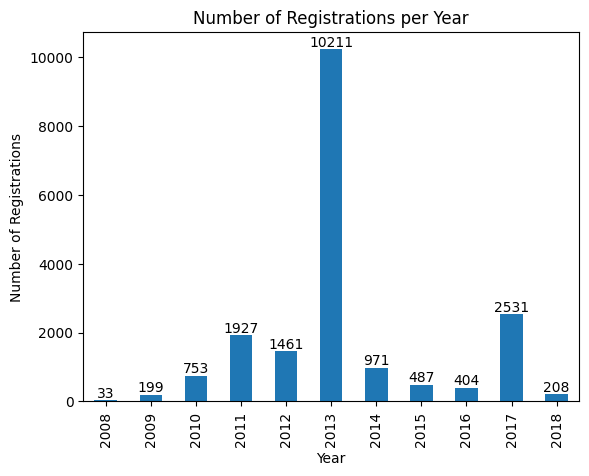

In [ ]:
# Extract the relevant columns
registration_years_1 = low_retention_customers['DateOfRegistration_Year']

# Count the number of registrations for each year
registration_counts_1 = registration_years_1.groupby(registration_years_1).count()

# Create a bar plot of the registration counts
ax = registration_counts_1.plot.bar()

for i in ax.containers:
    ax.bar_label(i, label_type='edge')

# Set the x-axis label
plt.xlabel('Year')

# Set the y-axis label
plt.ylabel('Number of Registrations')

# Set the title of the plot
plt.title('Number of Registrations per Year')

# Display the plot
plt.show()

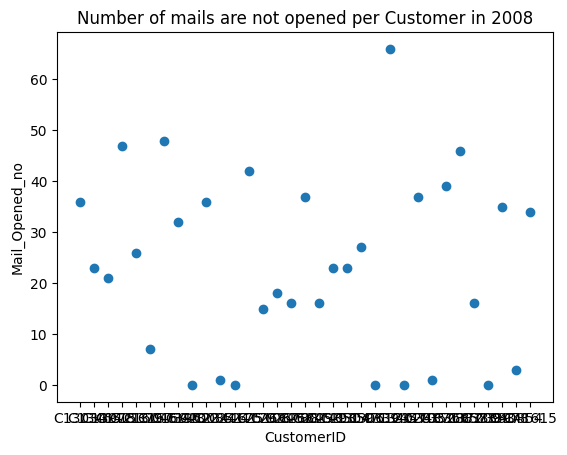

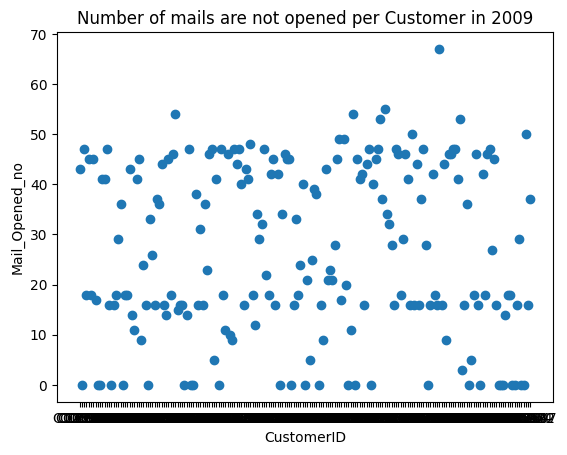

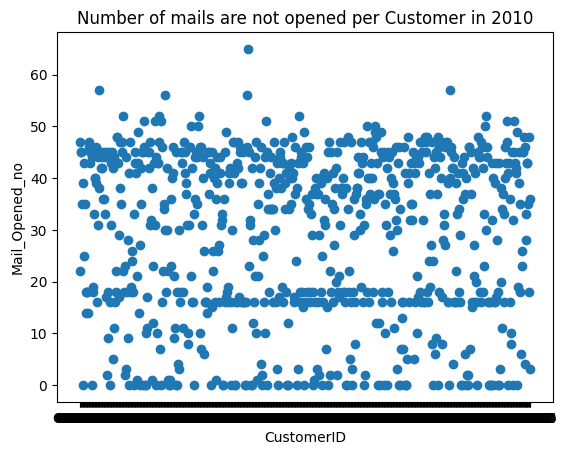

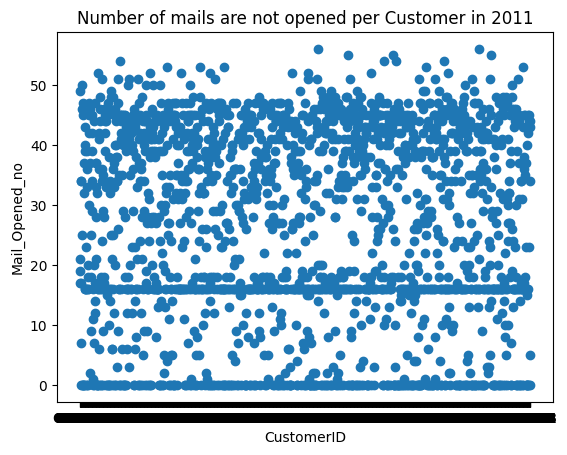

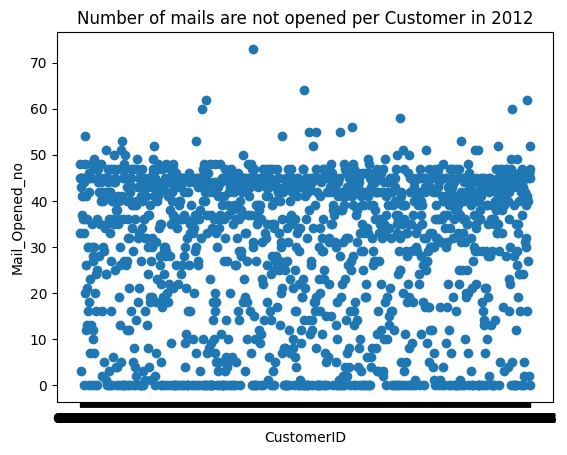

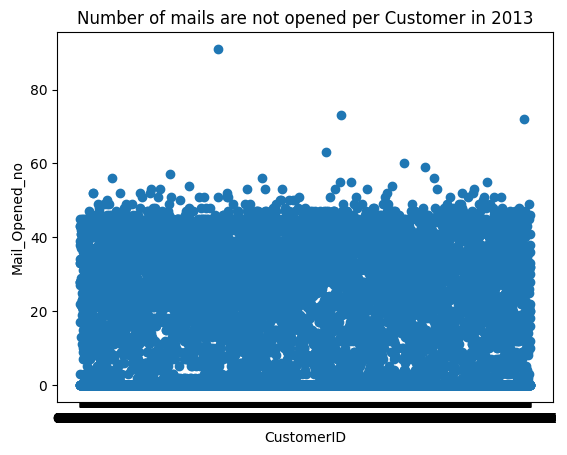

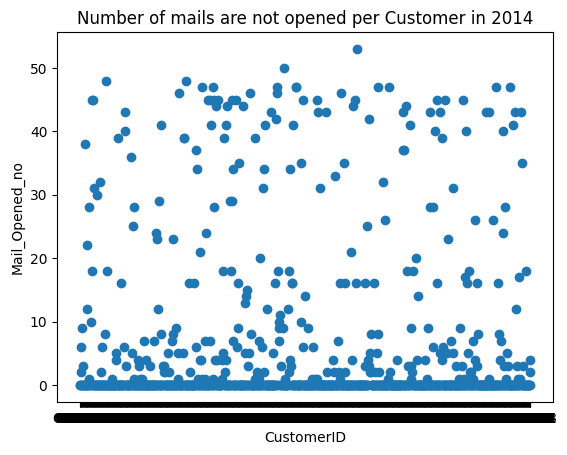

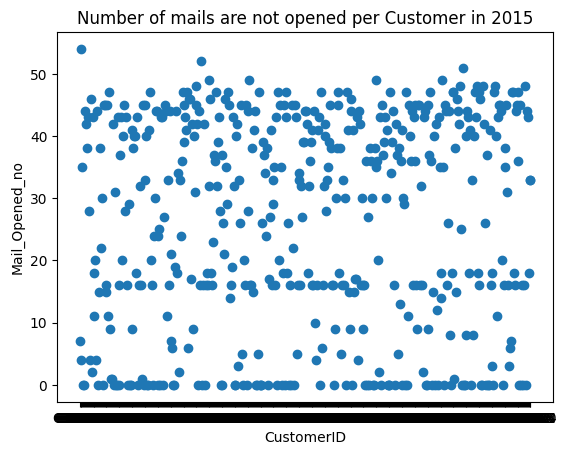

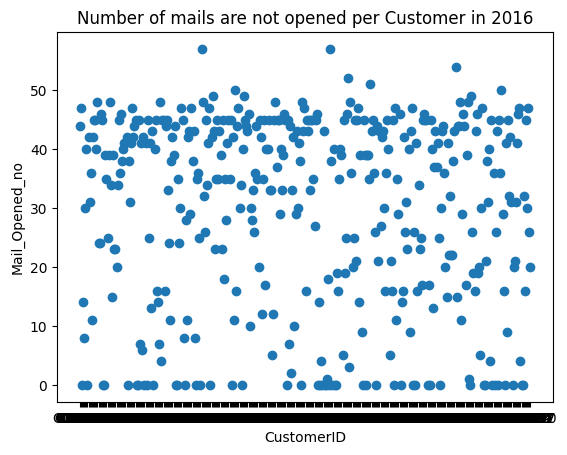

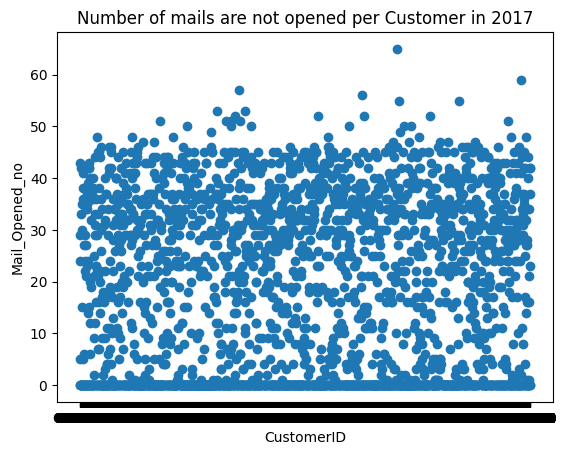

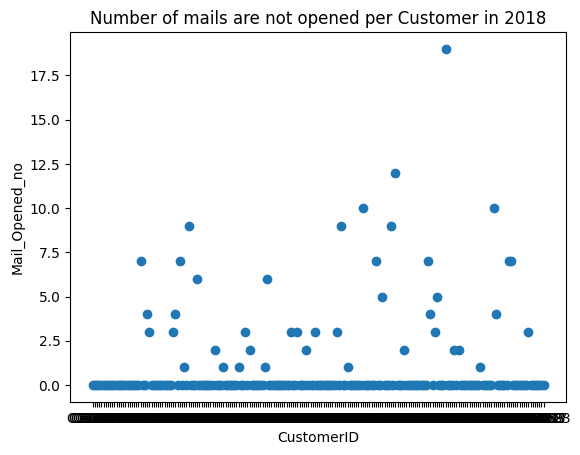

In [ ]:
# Loop over the years from 2008 to 2018
for year in range(2008, 2019):
    # Extract the relevant columns for the year
    registration_years = low_retention_customers['DateOfRegistration_Year'] == year
    year_data = low_retention_customers[registration_years]

    # Count the number of registrations for the year
    num_registrations = year_data['CustomerID'].nunique()

    # Calculate the number of customized emails per customer for the year
    mail_opened_no = year_data.groupby('CustomerID')['MailOpened_no'].sum()

    # Create the scatter plot
    plt.scatter(mail_opened_no.index, mail_opened_no.values)

    # Set the x-axis and y-axis labels
    plt.xlabel('CustomerID')
    plt.ylabel('Mail_Opened_no')

    # Set the title of the plot
    plt.title('Number of mails are not opened per Customer in {}'.format(year))

    # Show the plot
    plt.show()

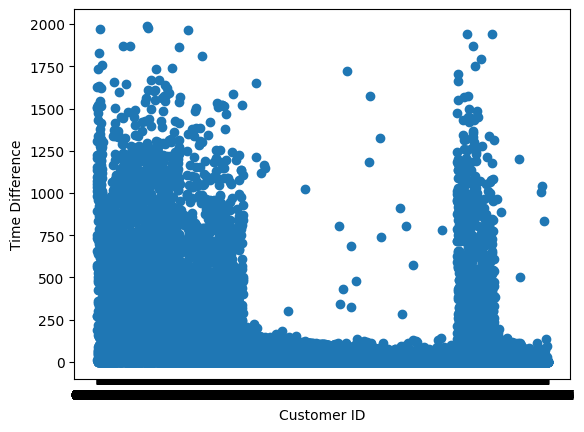

In [ ]:
plt.scatter(low_retention_customers['CustomerID'], low_retention_customers['TimeDifference'])
plt.xlabel('Customer ID')
plt.ylabel('Time Difference')
plt.show()

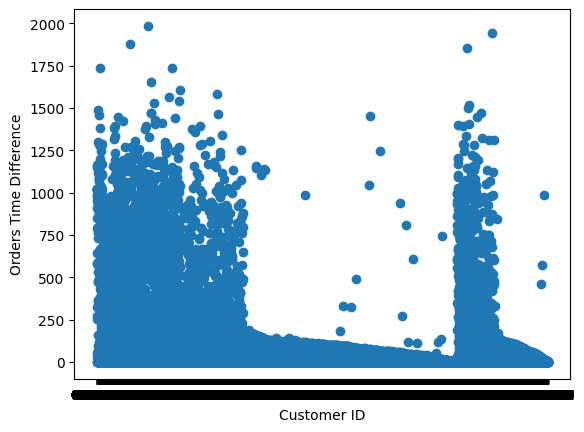

In [ ]:
plt.scatter(low_retention_customers['CustomerID'], low_retention_customers['Orders_TimeDifference'])
plt.xlabel('Customer ID')
plt.ylabel('Orders Time Difference')
plt.show()

# High Retention

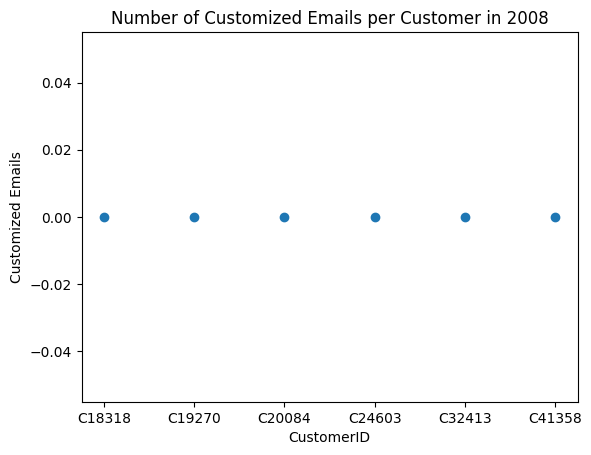

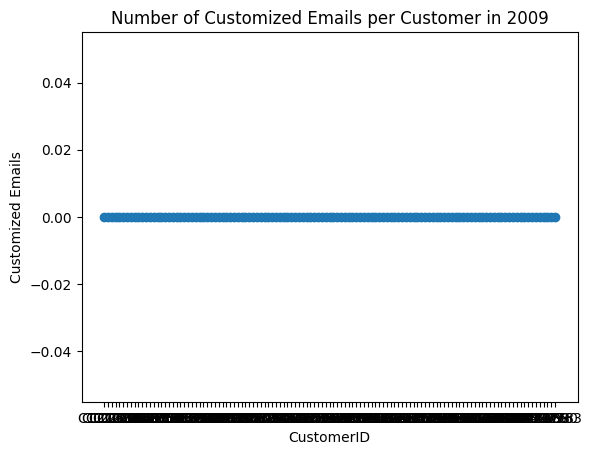

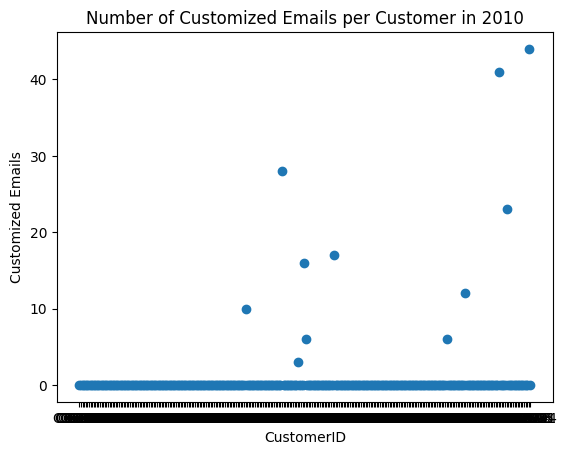

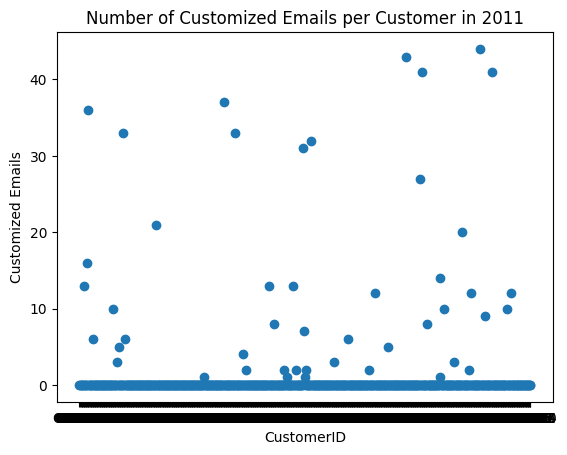

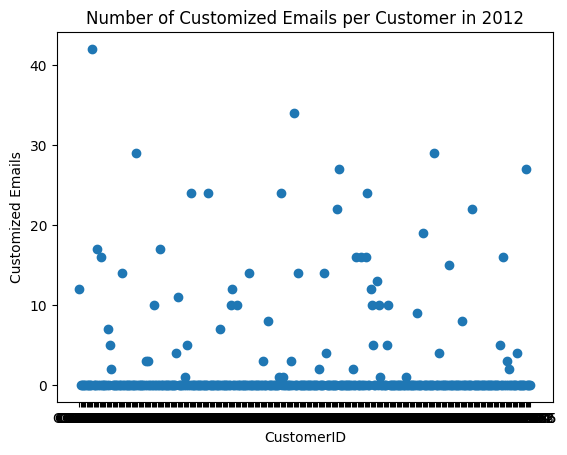

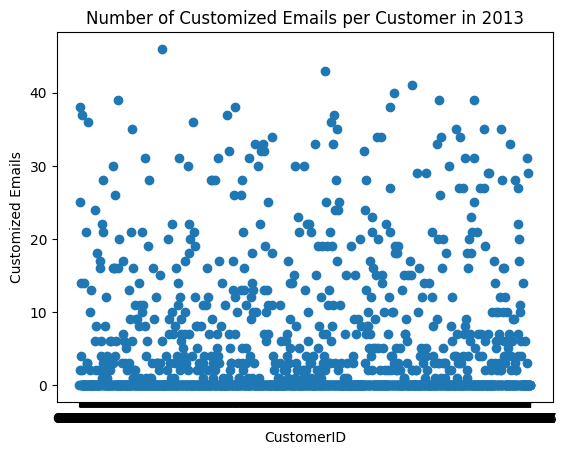

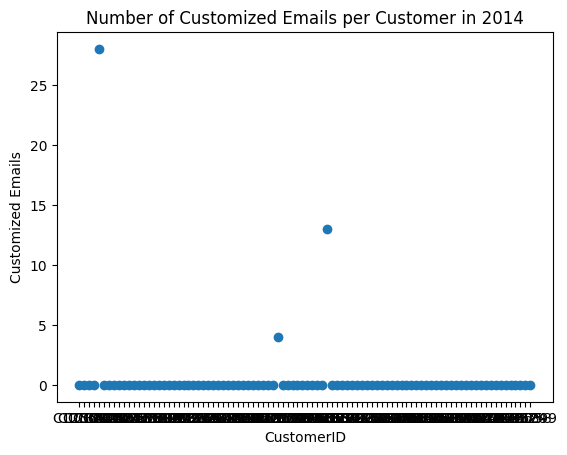

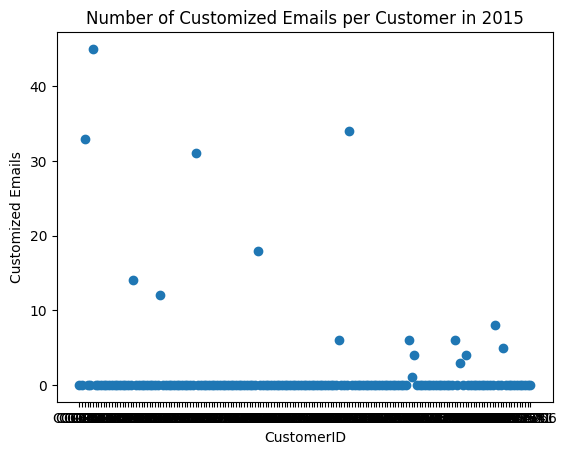

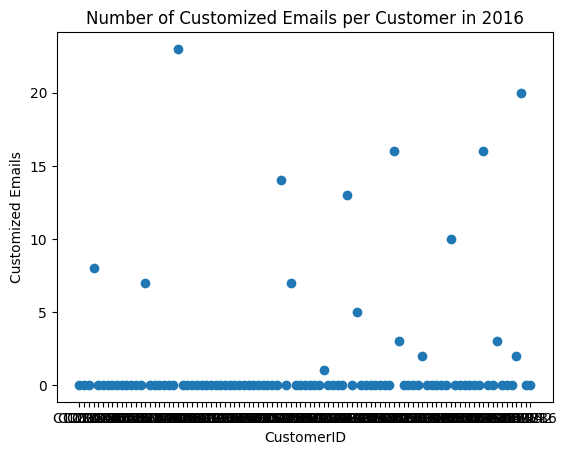

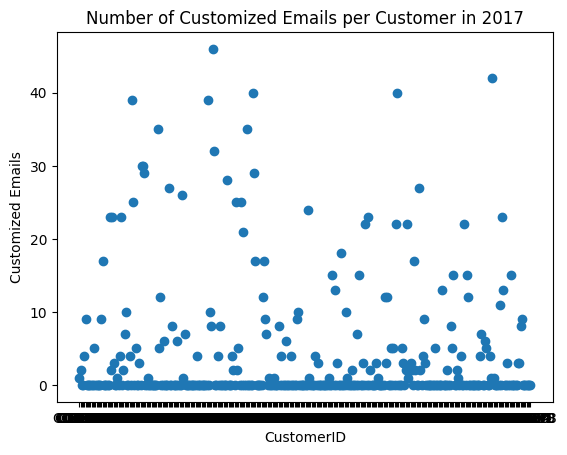

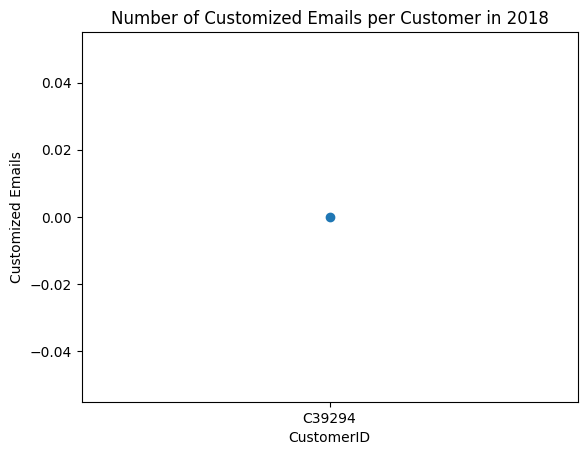

In [ ]:
# Loop over the years from 2008 to 2018
for year in range(2008, 2019):
    # Extract the relevant columns for the year
    registration_years = high_retention_customers['DateOfRegistration_Year'] == year
    year_data = high_retention_customers[registration_years]

    # Count the number of registrations for the year
    num_registrations = year_data['CustomerID'].nunique()

    # Calculate the number of customized emails per customer for the year
    customized_emails = year_data.groupby('CustomerID')['EmailType_CustomizedEmail'].sum()

    # Create the scatter plot
    plt.scatter(customized_emails.index, customized_emails.values)

    # Set the x-axis and y-axis labels
    plt.xlabel('CustomerID')
    plt.ylabel('Customized Emails')

    # Set the title of the plot
    plt.title('Number of Customized Emails per Customer in {}'.format(year))

    # Show the plot
    plt.show()

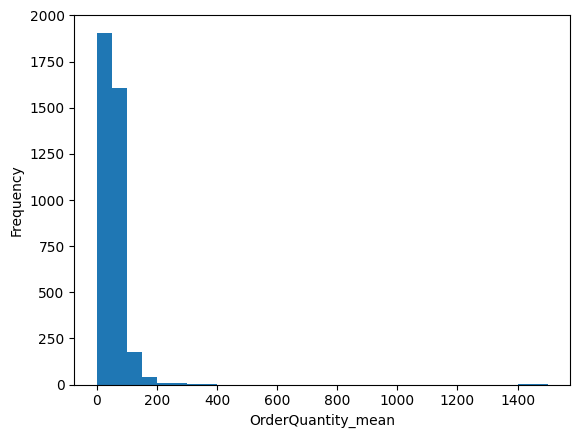

In [ ]:
# create a list of bin edges
bins = [0, 50,100,150, 200,250, 300,350, 400,450, 500,550,600,650,700, 750,800,850,900,950, 1000,1050,1100,1200,1300,1400, 1501]

# plot the histogram
plt.hist(high_retention_customers['OrderQuantity_mean'], bins=bins)

# set the x-axis label
plt.xlabel('OrderQuantity_mean')

# set the y-axis label
plt.ylabel('Frequency')

# show the plot
plt.show()

In [ ]:
# Filter the dataset to only include customers with order quantity is 0
zero_orderquantity_customers_high = high_retention_customers[high_retention_customers['OrderQuantity_mean'] == 0]
zero_orderquantity_customers_high

,CustomerID,City,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,DateOfRegistration_Year,DateOfRegistration_Month,DateOfRegistration_Day,EmailType_CustomizedEmail,MailOpened_yes,MailOpened_no,MailClicked_yes,TimeDifference,Orders_TimeDifference,OrderQuantity_mean,Orders_count,RetentionPotential


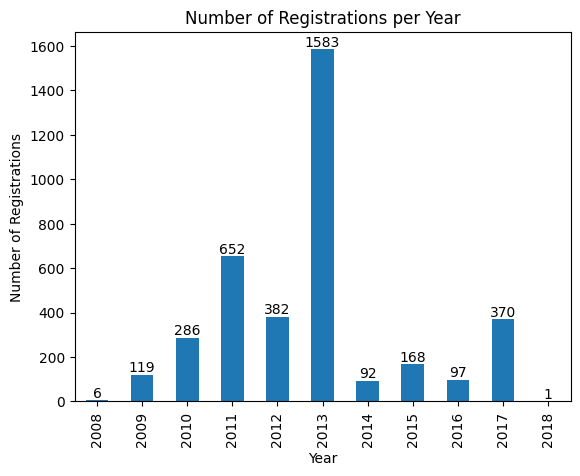

In [ ]:
# Extract the relevant columns
registration_years_0 = high_retention_customers['DateOfRegistration_Year']

# Count the number of registrations for each year
registration_counts_0 = registration_years_0.groupby(registration_years_0).count()

# Create a bar plot of the registration counts
ax = registration_counts_0.plot.bar()

for i in ax.containers:
    ax.bar_label(i, label_type='edge')

# Set the x-axis label
plt.xlabel('Year')

# Set the y-axis label
plt.ylabel('Number of Registrations')

# Set the title of the plot
plt.title('Number of Registrations per Year')

# Display the plot
plt.show()

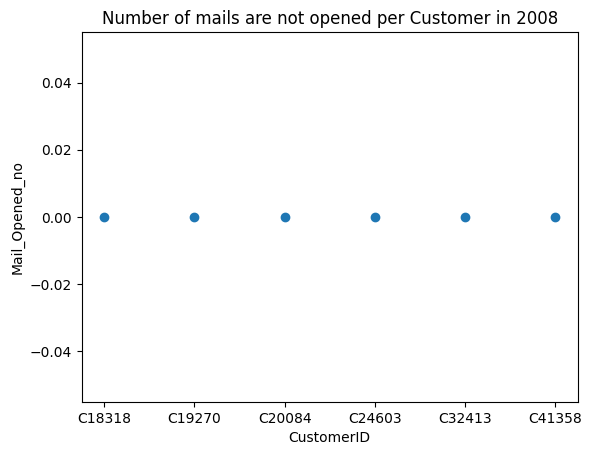

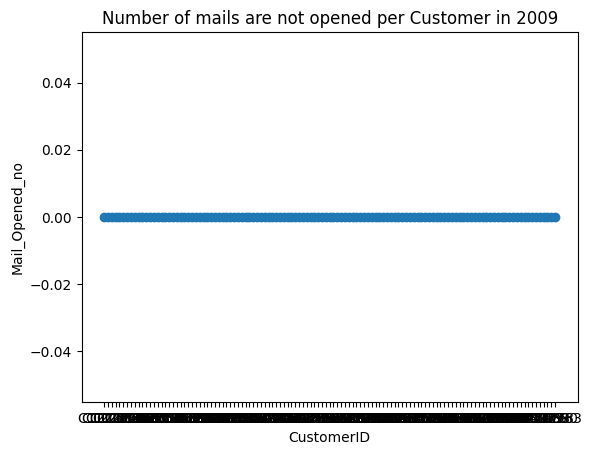

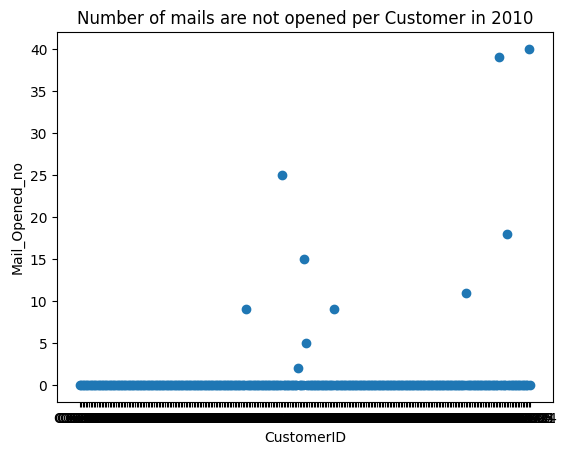

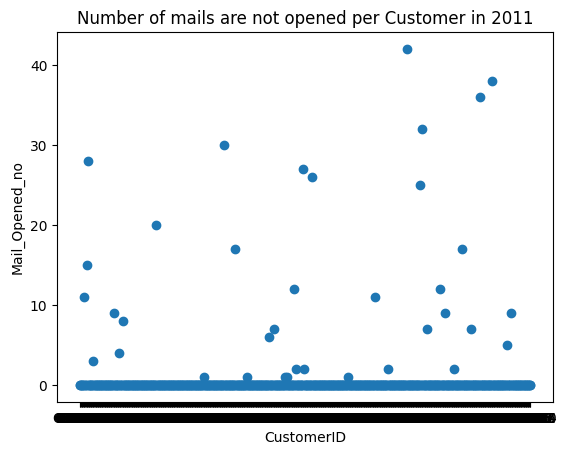

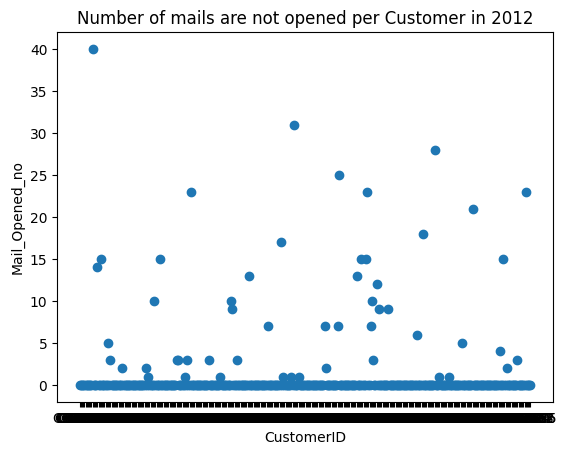

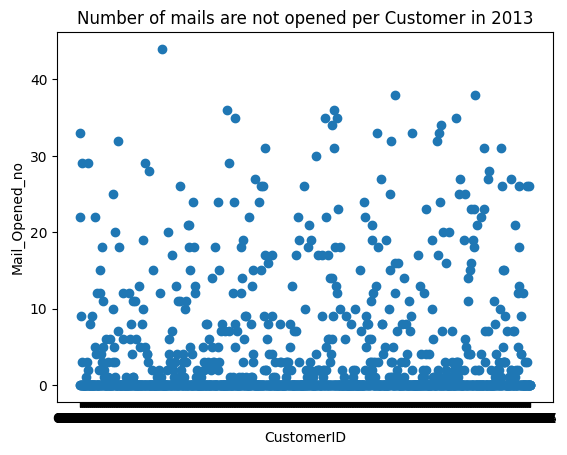

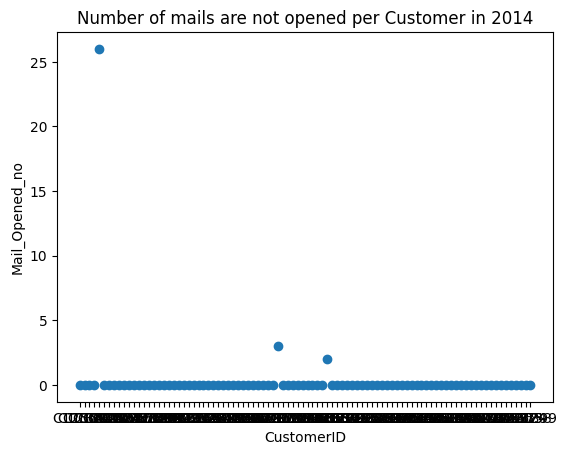

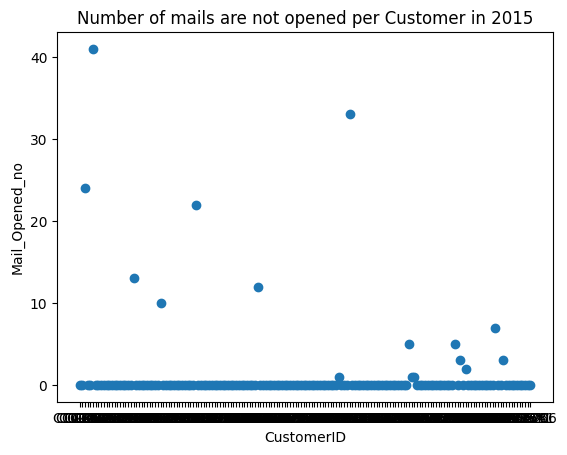

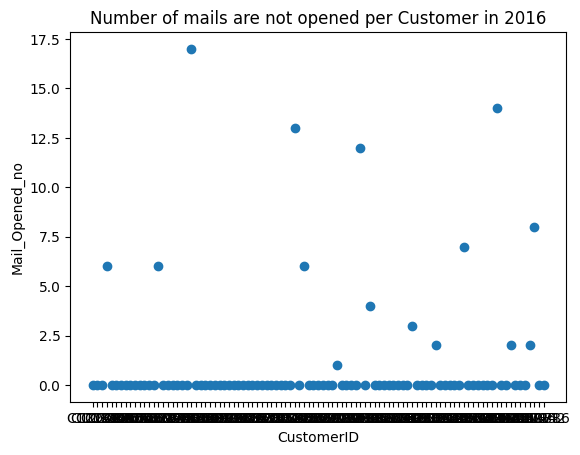

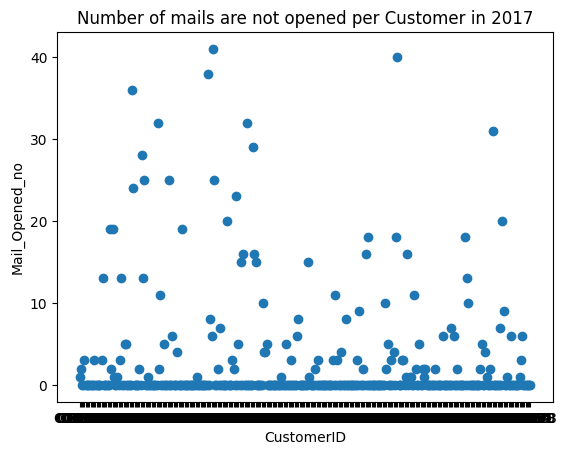

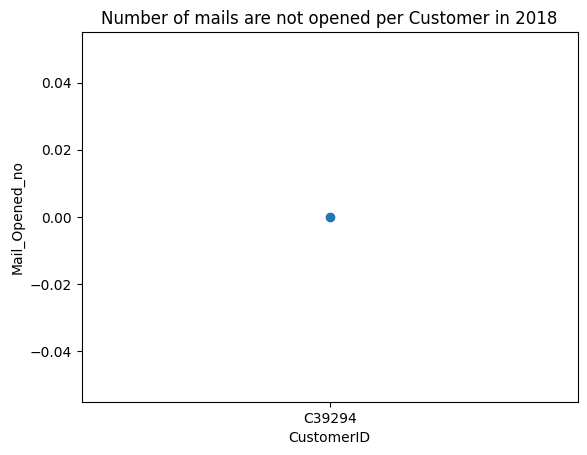

In [ ]:
# Loop over the years from 2008 to 2018
for year in range(2008, 2019):
    # Extract the relevant columns for the year
    registration_years = high_retention_customers['DateOfRegistration_Year'] == year
    year_data = high_retention_customers[registration_years]

    # Count the number of registrations for the year
    num_registrations = year_data['CustomerID'].nunique()

    # Calculate the number of customized emails per customer for the year
    mail_opened_no = year_data.groupby('CustomerID')['MailOpened_no'].sum()

    # Create the scatter plot
    plt.scatter(mail_opened_no.index, mail_opened_no.values)

    # Set the x-axis and y-axis labels
    plt.xlabel('CustomerID')
    plt.ylabel('Mail_Opened_no')

    # Set the title of the plot
    plt.title('Number of mails are not opened per Customer in {}'.format(year))

    # Show the plot
    plt.show()

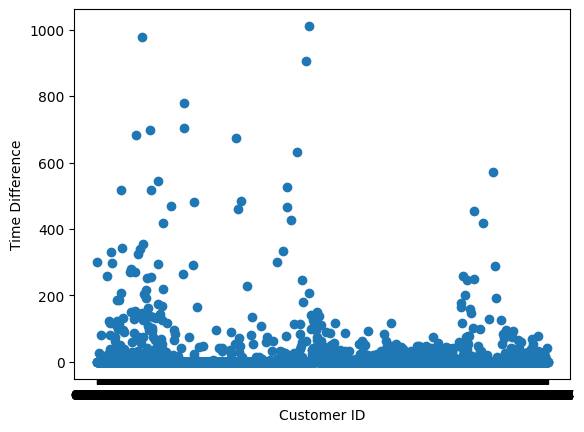

In [ ]:
plt.scatter(high_retention_customers['CustomerID'], high_retention_customers['TimeDifference'])
plt.xlabel('Customer ID')
plt.ylabel('Time Difference')
plt.show()

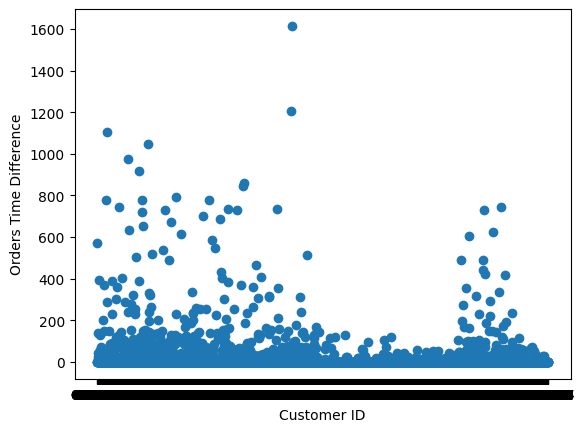

In [ ]:
plt.scatter(high_retention_customers['CustomerID'], high_retention_customers['Orders_TimeDifference'])
plt.xlabel('Customer ID')
plt.ylabel('Orders Time Difference')
plt.show()

In [ ]:
# Group the customers by city and calculate the proportion of medium retention customers in each city
city_retention_counts = medium_retention_customers.groupby('City')['RetentionPotential'].value_counts().unstack().fillna(0)
city_retention_counts

RetentionPotential,2
City,
0.0,28
1.0,454
2.0,121
3.0,276


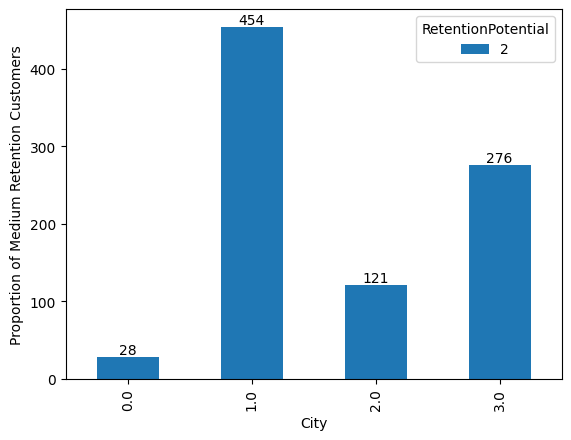

In [ ]:
ax = city_retention_counts.plot(kind='bar', stacked=True)
# Add the count values to the bars
for i in ax.containers:
    ax.bar_label(i, label_type='edge')
ax.set_xlabel('City')
ax.set_ylabel('Proportion of Medium Retention Customers')
plt.show()

In [ ]:
# Group the customers by DoorstepDelivery and calculate the proportion of medium retention customers who have opted for doorstep delivery
doorstep_delivery_counts = medium_retention_customers.groupby('DoorstepDelivery')['RetentionPotential'].value_counts().unstack().fillna(0)
doorstep_delivery_counts

RetentionPotential,2
DoorstepDelivery,
0,847
1,32


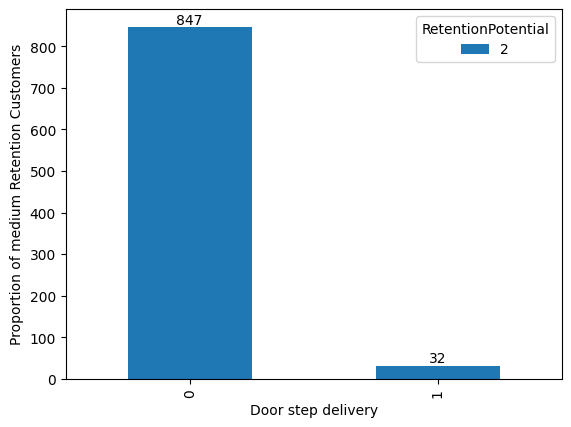

In [ ]:
ax = doorstep_delivery_counts.plot(kind='bar', stacked=True)
# Add the count values to the bars
for i in ax.containers:
    ax.bar_label(i, label_type='edge')
ax.set_xlabel('Door step delivery')
ax.set_ylabel('Proportion of medium Retention Customers')
plt.show()

In [ ]:
refill_retention_counts = medium_retention_customers.groupby('AutomaticRefill')['RetentionPotential'].value_counts().unstack().fillna(0)
refill_retention_counts

RetentionPotential,2
AutomaticRefill,
0,760
1,119


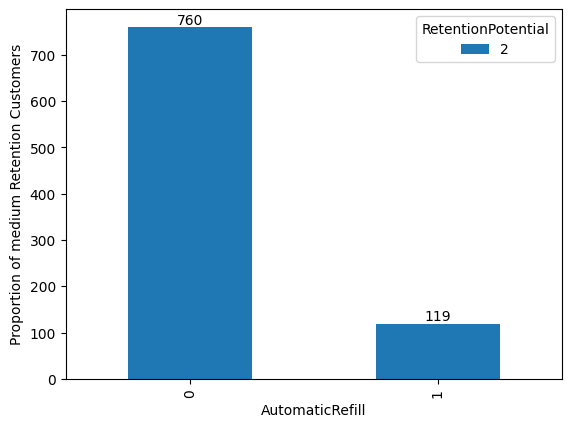

In [ ]:
ax = refill_retention_counts.plot(kind='bar', stacked=True)
# Add the count values to the bars
for i in ax.containers:
    ax.bar_label(i, label_type='edge')
ax.set_xlabel('AutomaticRefill')
ax.set_ylabel('Proportion of medium Retention Customers')
plt.show()

In [ ]:
# Group the customers by their usage of online communication channels and calculate the proportion of medium retention customers in each group
online_communication_counts = medium_retention_customers.groupby('OnlineCommunication')['RetentionPotential'].value_counts().unstack().fillna(0)
online_communication_counts

RetentionPotential,2
OnlineCommunication,
0,456
1,423
